In [2]:
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load your neural response data
dat = np.load('/home/maria/LuckyMouse2/pixel_transformer_neuro/data/processed/hybrid_neural_responses_reduced.npy')  # shape: (neurons, 118)
prob_matrix = dat / 50.0
epsilon = 1e-10
prob_matrix_safe = prob_matrix + epsilon
num_neurons, num_images = prob_matrix.shape

# Compute KL divergence from uniform
uniform_dist = np.full((num_images,), 1.0 / num_images)
kl_divs = []
for neuron_probs in prob_matrix_safe:
    neuron_dist = neuron_probs / np.sum(neuron_probs)
    kl = np.sum(uniform_dist * np.log(uniform_dist / neuron_dist))
    kl_divs.append(kl)
kl_divs = np.array(kl_divs)

# Bin setup
num_bins = 30
bin_edges = np.histogram_bin_edges(kl_divs, bins=num_bins)
bin_indices = np.digitize(kl_divs, bins=bin_edges) - 1

# Prepare data for each bin
bin_to_neuron_indices = {i: [] for i in range(num_bins)}
for idx, bin_idx in enumerate(bin_indices):
    if 0 <= bin_idx < num_bins:
        bin_to_neuron_indices[bin_idx].append(idx)

bin_counts = [len(bin_to_neuron_indices[i]) for i in range(num_bins)]
bin_labels = [f"{bin_edges[i]:.2f}–{bin_edges[i+1]:.2f}" for i in range(num_bins)]

# Widget for outputting the secondary plot
output_plot = widgets.Output()

# Define the click handler
def on_bar_click(trace, points, state):
    with output_plot:
        clear_output(wait=True)
        if points.point_inds:
            bin_idx = points.point_inds[0]
            neuron_ids = bin_to_neuron_indices.get(bin_idx, [])
            if neuron_ids:
                neuron_id = neuron_ids[0]
                sorted_events = np.sort(dat[neuron_id])
                fig_detail = go.Figure()
                fig_detail.add_trace(go.Bar(
                    x=list(range(len(sorted_events))),
                    y=sorted_events,
                    marker_color='mediumpurple'
                ))
                fig_detail.update_layout(
                    title=f"Sorted Event Counts for First Neuron in Bin {bin_labels[bin_idx]}",
                    xaxis_title="Sorted Stimulus Index",
                    yaxis_title="Event Count",
                    height=300
                )
                fig_detail.show()
            else:
                print("No neurons in this bin.")

# Create main histogram figure
fig = go.FigureWidget(
    data=[go.Bar(x=bin_labels, y=bin_counts, marker_color='lightskyblue')],
    layout=dict(
        title="KL Divergence from Uniform Distribution (per Neuron)",
        xaxis_title="KL Divergence Bin",
        yaxis_title="Number of Neurons",
        xaxis_tickangle=45,
        bargap=0.1
    )
)

# Attach the click callback
fig.data[0].on_click(on_bar_click)

# Display in notebook
display(fig)
display(output_plot)


FigureWidget({
    'data': [{'marker': {'color': 'lightskyblue'},
              'type': 'bar',
              'uid': 'd487f4ca-12ad-46b3-a57c-938240812320',
              'x': [0.02–0.48, 0.48–0.95, 0.95–1.42, 1.42–1.89, 1.89–2.36,
                    2.36–2.83, 2.83–3.30, 3.30–3.77, 3.77–4.24, 4.24–4.70,
                    4.70–5.17, 5.17–5.64, 5.64–6.11, 6.11–6.58, 6.58–7.05,
                    7.05–7.52, 7.52–7.99, 7.99–8.46, 8.46–8.92, 8.92–9.39,
                    9.39–9.86, 9.86–10.33, 10.33–10.80, 10.80–11.27, 11.27–11.74,
                    11.74–12.21, 12.21–12.68, 12.68–13.14, 13.14–13.61,
                    13.61–14.08],
              'y': [2333, 1268, 1285, 1452, 1679, 1911, 2256, 2396, 2556, 2697,
                    2874, 2689, 2603, 2322, 2124, 1729, 1470, 1191, 894, 599, 354,
                    237, 123, 72, 46, 22, 12, 8, 5, 1]}],
    'layout': {'bargap': 0.1,
               'template': '...',
               'title': {'text': 'KL Divergence from Uniform Distributi

Output()

In [ ]:
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load data
dat = np.load('/home/maria/LuckyMouse2/pixel_transformer_neuro/data/processed/hybrid_neural_responses_reduced.npy')
num_neurons, num_images = dat.shape

# Compute KL divergence from uniform
prob_matrix = dat / 50.0
epsilon = 1e-10
prob_matrix_safe = prob_matrix + epsilon
uniform_dist = np.full((num_images,), 1.0 / num_images)

kl_divs = []
for neuron_probs in prob_matrix_safe:
    neuron_dist = neuron_probs / np.sum(neuron_probs)
    kl = np.sum(uniform_dist * np.log(uniform_dist / neuron_dist))
    kl_divs.append(kl)
kl_divs = np.array(kl_divs)

# Bin KL values
num_bins = 30
bin_edges = np.histogram_bin_edges(kl_divs, bins=num_bins)
bin_indices = np.digitize(kl_divs, bins=bin_edges) - 1

bin_to_neuron_indices = {i: [] for i in range(num_bins)}
for idx, bin_idx in enumerate(bin_indices):
    if 0 <= bin_idx < num_bins:
        bin_to_neuron_indices[bin_idx].append(idx)

bin_counts = [len(bin_to_neuron_indices[i]) for i in range(num_bins)]
bin_labels = [f"{bin_edges[i]:.2f}–{bin_edges[i+1]:.2f}" for i in range(num_bins)]

# Output widget for secondary plot
output_plot = widgets.Output()

# Click callback
def on_bar_click(trace, points, state):
    with output_plot:
        clear_output(wait=True)
        if points.point_inds:
            bin_idx = points.point_inds[0]
            neuron_ids = bin_to_neuron_indices.get(bin_idx, [])
            if neuron_ids:
                neuron_id = neuron_ids[0]
                event_counts = dat[neuron_id]  # raw counts (0–50)
                hist_counts = np.bincount(event_counts, minlength=51)  # 0–50

                fig_detail = go.Figure()
                fig_detail.add_trace(go.Bar(
                    x=np.arange(51),
                    y=hist_counts,
                    marker_color='darkorange'
                ))
                fig_detail.update_layout(
                    title=f"Event Count Histogram for First Neuron in Bin {bin_labels[bin_idx]}",
                    xaxis_title="Event Count (0–50)",
                    yaxis_title="Number of Images",
                    height=300
                )
                fig_detail.show()
            else:
                print("No neurons in this bin.")

# Main histogram
fig = go.FigureWidget(
    data=[go.Bar(x=bin_labels, y=bin_counts, marker_color='lightskyblue')],
    layout=dict(
        title="KL Divergence from Uniform Distribution (per Neuron)",
        xaxis_title="KL Divergence Bin",
        yaxis_title="Number of Neurons",
        xaxis_tickangle=45,
        bargap=0.1
    )
)

fig.data[0].on_click(on_bar_click)

# Show both plots
display(fig)
display(output_plot)


FigureWidget({
    'data': [{'marker': {'color': 'lightskyblue'},
              'type': 'bar',
              'uid': 'f9652193-21ad-426b-8320-289f3e1ef600',
              'x': [0.02–0.48, 0.48–0.95, 0.95–1.42, 1.42–1.89, 1.89–2.36,
                    2.36–2.83, 2.83–3.30, 3.30–3.77, 3.77–4.24, 4.24–4.70,
                    4.70–5.17, 5.17–5.64, 5.64–6.11, 6.11–6.58, 6.58–7.05,
                    7.05–7.52, 7.52–7.99, 7.99–8.46, 8.46–8.92, 8.92–9.39,
                    9.39–9.86, 9.86–10.33, 10.33–10.80, 10.80–11.27, 11.27–11.74,
                    11.74–12.21, 12.21–12.68, 12.68–13.14, 13.14–13.61,
                    13.61–14.08],
              'y': [2333, 1268, 1285, 1452, 1679, 1911, 2256, 2396, 2556, 2697,
                    2874, 2689, 2603, 2322, 2124, 1729, 1470, 1191, 894, 599, 354,
                    237, 123, 72, 46, 22, 12, 8, 5, 1]}],
    'layout': {'bargap': 0.1,
               'template': '...',
               'title': {'text': 'KL Divergence from Uniform Distributi

Output()

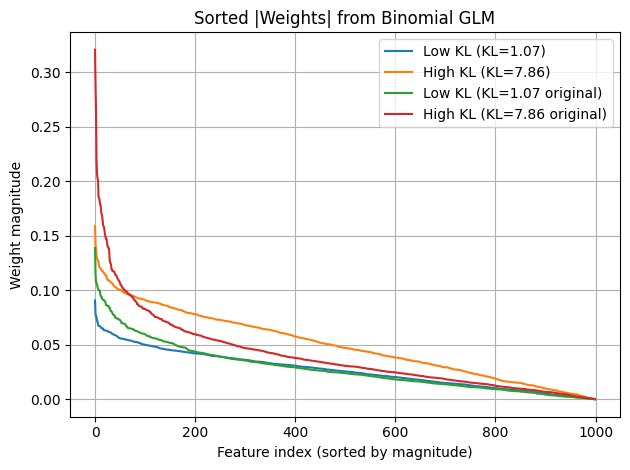

In [19]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from skbio.stats.composition import clr
# Setup
n_trials = 50
device = "cpu"

# === Define Model ===
class BinomialGLM(nn.Module):
    def __init__(self, in_features, l2_reg=1e-3):
        super().__init__()
        self.linear = nn.Linear(in_features, 1)
        self.l2_reg = l2_reg

    def forward(self, x):
        logits = self.linear(x)
        return torch.sigmoid(logits)

    def loss(self, x, y, n_trials):
        p = self.forward(x).squeeze()
        binom = torch.distributions.Binomial(total_count=n_trials, probs=p)
        nll = -binom.log_prob(y).mean()
        l2 = self.l2_reg * torch.sum(self.linear.weight ** 2)
        return nll + l2

dataset_path_dict = {
        "embeddings": "/home/maria/LuckyMouse2/pixel_transformer_neuro/data/processed/google_vit-base-patch16-224_embeddings_softmax.pkl",
        "neural": "/home/maria/LuckyMouse2/pixel_transformer_neuro/data/processed/hybrid_neural_responses_reduced.npy"
    }
# === Load your data ===
import pickle 

with open(dataset_path_dict['embeddings'], "rb") as f:
    embeddings_raw = pickle.load(f)
X = clr(embeddings_raw['natural_scenes']) # shape (n_images, n_features)
counts = np.load(dataset_path_dict['neural'])  # shape (n_neurons, n_images)
#kl_divs = ...  # shape (n_neurons,)

# Normalize features
#X = (X - X.mean(axis=0)) / X.std(axis=0)

# Select neurons
low_kl_idx = np.argsort(kl_divs)[int(0.1 * len(kl_divs))]
high_kl_idx = np.argsort(kl_divs)[int(0.9 * len(kl_divs))]

neuron_indices = [low_kl_idx, high_kl_idx]
labels = ["Low KL", "High KL"]
X_shuffled = X[np.random.permutation(X.shape[0])]
X_shuffled = np.apply_along_axis(np.random.permutation, axis=1, arr=X)
X_shuffled = np.array([np.random.permutation(row) for row in X])
# Convert features to tensor
X_tensor = torch.tensor(X_shuffled, dtype=torch.float32)
X_tensor_ = torch.tensor(X, dtype=torch.float32)

# === Fit and compare ===
for idx, label in zip(neuron_indices, labels):
    y_counts = counts[idx]
    y_tensor = torch.tensor(y_counts, dtype=torch.float32)

    model = BinomialGLM(X.shape[1], l2_reg=1e-2).to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-2)

    for epoch in range(500):
        optimizer.zero_grad()
        loss = model.loss(X_tensor, y_tensor, n_trials)
        loss.backward()
        optimizer.step()

    # Extract and plot weights
    with torch.no_grad():
        weights = model.linear.weight.cpu().numpy().flatten()

    plt.plot(np.sort(np.abs(weights))[::-1], label=f"{label} (KL={kl_divs[idx]:.2f})")

for idx, label in zip(neuron_indices, labels):
    y_counts = counts[idx]
    y_tensor = torch.tensor(y_counts, dtype=torch.float32)

    model = BinomialGLM(X.shape[1], l2_reg=1e-2).to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-2)

    for epoch in range(500):
        optimizer.zero_grad()
        loss = model.loss(X_tensor_, y_tensor, n_trials)
        loss.backward()
        optimizer.step()

    # Extract and plot weights
    with torch.no_grad():
        weights = model.linear.weight.cpu().numpy().flatten()

    plt.plot(np.sort(np.abs(weights))[::-1], label=f"{label} (KL={kl_divs[idx]:.2f} original)")

plt.title("Sorted |Weights| from Binomial GLM")
plt.xlabel("Feature index (sorted by magnitude)")
plt.ylabel("Weight magnitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


(118,) (118,)
(118,) (118,)


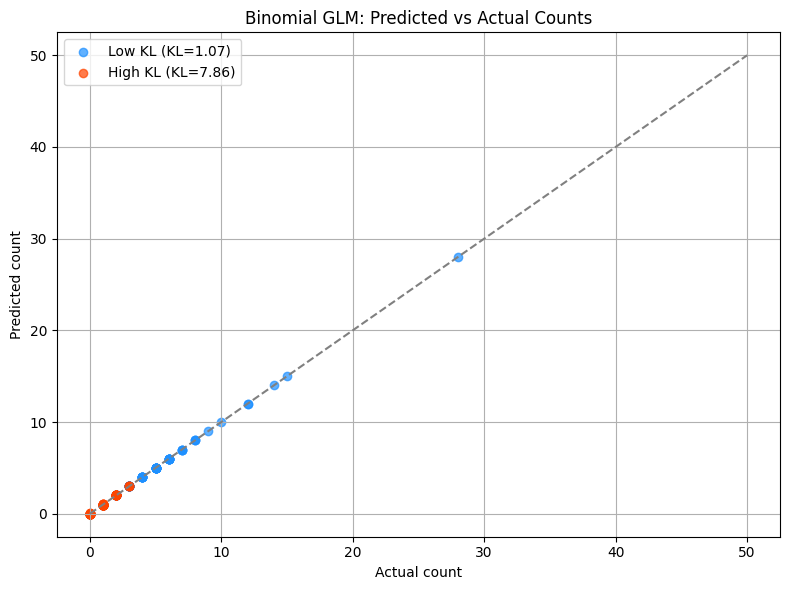

In [16]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Parameters
n_trials = 50
device = "cpu"
l2_reg_strength = 1e-2

# === Define Model ===
class BinomialGLM(nn.Module):
    def __init__(self, in_features, l2_reg=1e-3):
        super().__init__()
        self.linear = nn.Linear(in_features, 1)
        self.l2_reg = l2_reg

    def forward(self, x):
        logits = self.linear(x)
        return torch.sigmoid(logits)

    def loss(self, x, y, n_trials):
        p = self.forward(x).squeeze()
        binom = torch.distributions.Binomial(total_count=n_trials, probs=p)
        nll = -binom.log_prob(y).mean()
        l2 = self.l2_reg * torch.sum(self.linear.weight ** 2)
        return nll + l2

# === Load your data ===
#X = ...  # (n_images, n_features)
#counts = ...  # (n_neurons, n_images)
#kl_divs = ...  # (n_neurons,)

# Normalize features
#X = (X - X.mean(axis=0)) / X.std(axis=0)
X_shuffled = np.apply_along_axis(np.random.permutation, axis=1, arr=X)

# Select neurons
low_kl_idx = np.argsort(kl_divs)[int(0.1 * len(kl_divs))]
high_kl_idx = np.argsort(kl_divs)[int(0.9 * len(kl_divs))]

neuron_indices = [low_kl_idx, high_kl_idx]
labels = ["Low KL", "High KL"]
colors = ["dodgerblue", "orangered"]

X_tensor = torch.tensor(X_shuffled, dtype=torch.float32)

plt.figure(figsize=(8, 6))
for idx, label, color in zip(neuron_indices, labels, colors):
    y_counts = counts[idx]
    y_tensor = torch.tensor(y_counts, dtype=torch.float32)

    model = BinomialGLM(X.shape[1], l2_reg=l2_reg_strength).to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-2)

    for epoch in range(500):
        optimizer.zero_grad()
        loss = model.loss(X_tensor, y_tensor, n_trials)
        loss.backward()
        optimizer.step()

    # Predictions
    with torch.no_grad():
        probs = model(X_tensor).squeeze().numpy()
        y_pred = n_trials * probs

    # Plot: predicted vs actual
    plt.scatter(y_counts, y_pred, label=f"{label} (KL={kl_divs[idx]:.2f})", alpha=0.7, color=color)
    print(y_counts.shape,y_pred.shape)

plt.plot([0, n_trials], [0, n_trials], linestyle='--', color='gray')
plt.xlabel("Actual count")
plt.ylabel("Predicted count")
plt.title("Binomial GLM: Predicted vs Actual Counts")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


(array([51.,  0.,  0., 48.,  0.,  0., 15.,  0.,  0.,  4.]),
 array([1.39841449e-03, 3.02386045e-01, 6.03373706e-01, 9.04361367e-01,
        1.20534897e+00, 1.50633657e+00, 1.80732429e+00, 2.10831165e+00,
        2.40929937e+00, 2.71028709e+00, 3.01127458e+00]),
 <BarContainer object of 10 artists>)

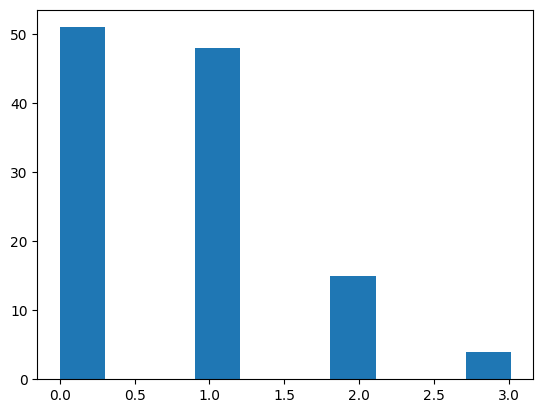

In [18]:
plt.hist(y_pred)

In [15]:
print(X.shape)

(118, 1000)
